In [1]:
from IPython.display import Image

## residual stream

- residual connection
    - one layer: $x = x + \Delta x_1$
    - two layer: $x = x + \Delta x_1 + \Delta x_2$
- residual stream
    - $x = x + \sum_h h(x) + m(x)$
    - 不断地在这个中轴线上 added new information
    - Both the attention and MLP layers
        - each “read” their input from the residual stream (by performing a linear projection),
            - attention：$h(x_i)$
            - mlp: $m(x_i)$
        - and then “write” their result to the residual stream by adding a linear projection back in.
            - $x_{i+1}=x_i+\sum_h h(x_i)$
            - $x_{i+2}=x_{i+1}+m(x_{i+1})$
        - Each attention layer consists of multiple heads, which operate in parallel.

In [2]:
Image(url='./imgs/residual-stream.png', width=500)

## induction head

## SAE & dictionary learning

- https://transformer-circuits.pub/2024/scaling-monosemanticity/index.html

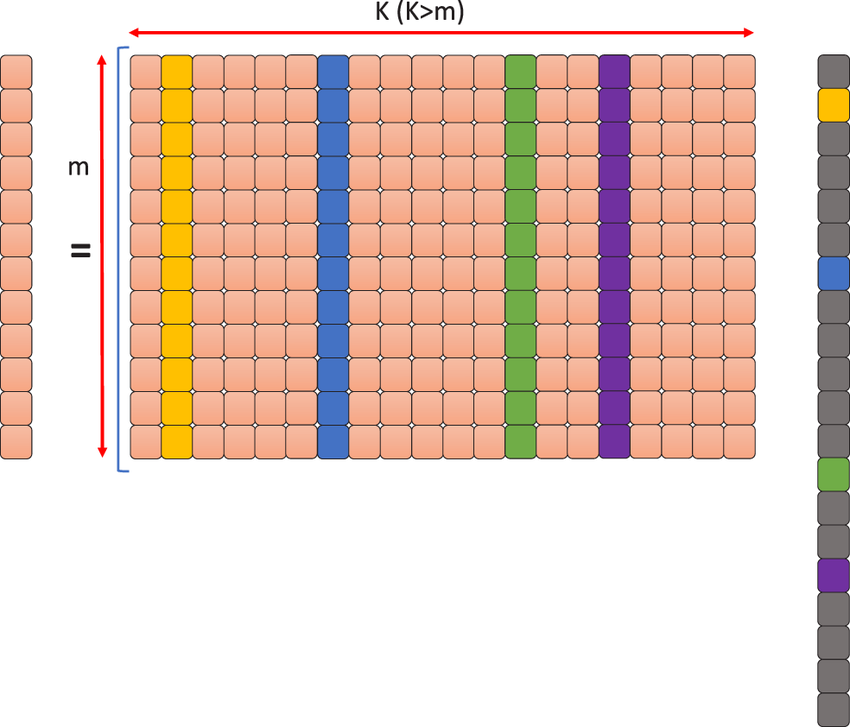

In [3]:
Image('./imgs/Basic-model-of-sparse-representation-theory.png', width=400)

- Dictionary Learning

    $$
    x^m=D^{m\times K}\alpha^{K}
    $$
  
  - $K>>m$，overcomplete
  - $D$ 中的每一列，表示一个 basis vector
- SAE

    $$
    \begin{split}
    f_i(\mathbf{x}) &= \text{ReLU} \left( \mathbf{W}_{i,:}^{\text{enc}} \cdot \mathbf{x} + \mathbf{b}_i^{\text{enc}} \right)\\
    \hat{\mathbf{x}} &= \mathbf{b}^{\text{dec}} + \sum_{i=1}^{F} f_i(\mathbf{x}) \mathbf{W}_{:,i}^{\text{dec}}=\mathbf{b}^{\text{dec}} + \mathbf{W}^{\text{dec}}f(\mathbf x)\\
    \mathcal{L} &= \mathbb{E}_{\mathbf{x}} \left[ \| \mathbf{x} - \hat{\mathbf{x}} \|_2^2 + \lambda \sum_i f_i(\mathbf{x}) \cdot \| \mathbf{W}_{:,i}^{\text{dec}} \|_2 \right]
    \end{split}
    $$

  - $\mathbf{W}^{\text{dec}}$ 相当于字典 $D$，$f(\mathbf x)$ 则相当于稀疏表示 $\alpha$

## QK circuits & OV circuits


- 不考虑 attention 后跟着的 mlp 的情况，两个 attention 相连

$$
\begin{split}
x'&=\left(\text{Softmax}(\frac{xW_qW_k^Tx^T}{\sqrt {d}})xW_v\right)\cdot {W_o}^T\\
x''&=\cdots x'W_qW_k^Tx'^T \cdots\\
x''&=\cdots W_qW_k^TW_oW_v^T \cdots
\end{split}
$$